In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression 

from sklearn.metrics import classification_report

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

from sklearn import metrics

In [3]:
data=pd.read_csv("Autism_Data.arff")

In [4]:
data.head(10)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2,'18 and more',?,NO
5,1,1,1,1,1,0,1,1,1,1,...,m,Others,yes,no,'United States',no,9,'18 and more',Self,YES
6,0,1,0,0,0,0,0,1,0,0,...,f,Black,no,no,'United States',no,2,'18 and more',Self,NO
7,1,1,1,1,0,0,0,0,1,0,...,m,White-European,no,no,'New Zealand',no,5,'18 and more',Parent,NO
8,1,1,0,0,1,0,0,1,1,1,...,m,White-European,no,no,'United States',no,6,'18 and more',Self,NO
9,1,1,1,1,0,1,1,1,1,0,...,m,Asian,yes,yes,Bahamas,no,8,'18 and more','Health care professional',YES


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   A1_Score         704 non-null    int64 
 1   A2_Score         704 non-null    int64 
 2   A3_Score         704 non-null    int64 
 3   A4_Score         704 non-null    int64 
 4   A5_Score         704 non-null    int64 
 5   A6_Score         704 non-null    int64 
 6   A7_Score         704 non-null    int64 
 7   A8_Score         704 non-null    int64 
 8   A9_Score         704 non-null    int64 
 9   A10_Score        704 non-null    int64 
 10  age              704 non-null    object
 11  gender           704 non-null    object
 12  ethnicity        704 non-null    object
 13  jundice          704 non-null    object
 14  austim           704 non-null    object
 15  contry_of_res    704 non-null    object
 16  used_app_before  704 non-null    object
 17  result           704 non-null    in

<Axes: >

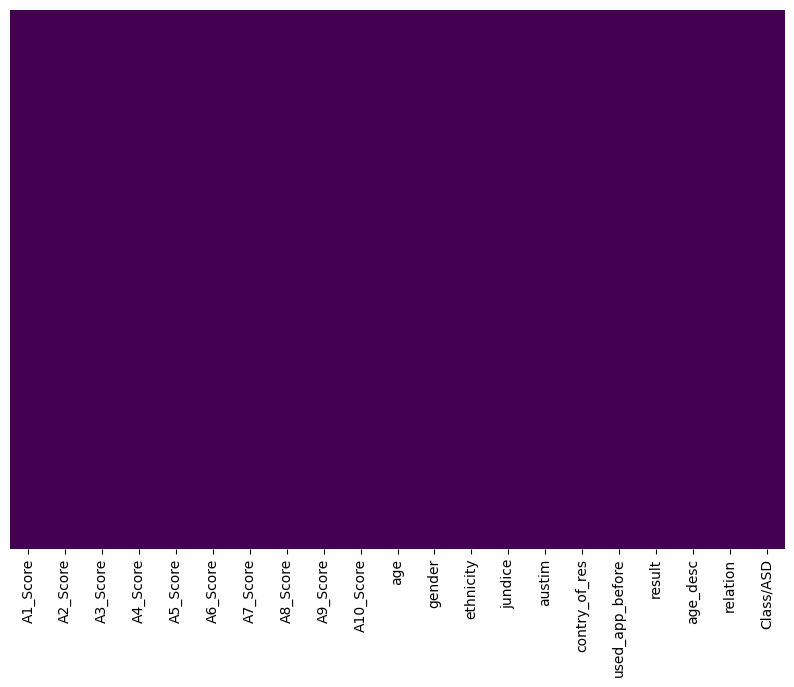

In [6]:
plt.figure(figsize=(10,7))
sns.heatmap(data.isnull(),cmap="viridis",cbar=False,yticklabels=False)

In [7]:
data.replace("?",np.nan,inplace=True)

In [8]:
data.head(20)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,NaN,no,no,Egypt,no,2,'18 and more',NaN,NO
5,1,1,1,1,1,0,1,1,1,1,...,m,Others,yes,no,'United States',no,9,'18 and more',Self,YES
6,0,1,0,0,0,0,0,1,0,0,...,f,Black,no,no,'United States',no,2,'18 and more',Self,NO
7,1,1,1,1,0,0,0,0,1,0,...,m,White-European,no,no,'New Zealand',no,5,'18 and more',Parent,NO
8,1,1,0,0,1,0,0,1,1,1,...,m,White-European,no,no,'United States',no,6,'18 and more',Self,NO
9,1,1,1,1,0,1,1,1,1,0,...,m,Asian,yes,yes,Bahamas,no,8,'18 and more','Health care professional',YES


<Axes: >

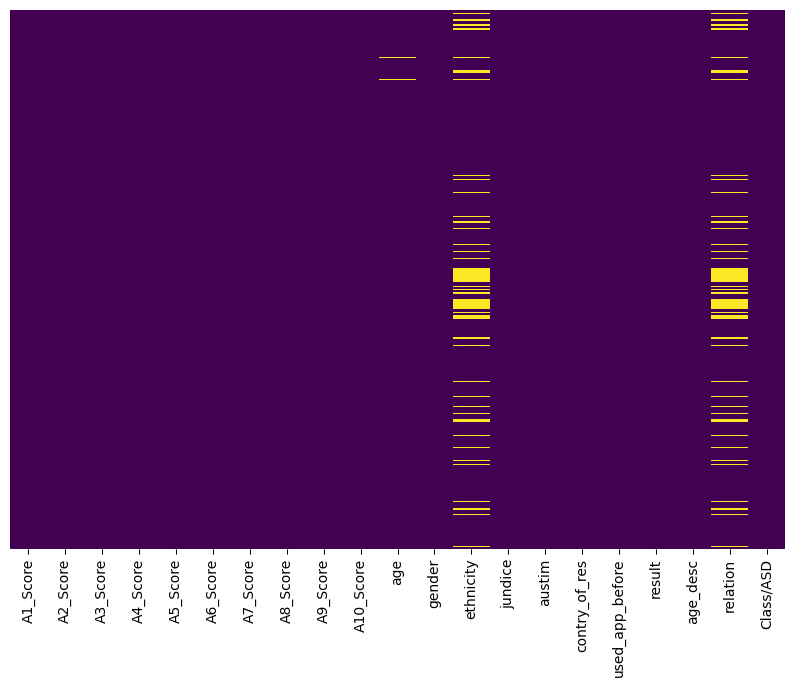

In [9]:
plt.figure(figsize=(10,7))
sns.heatmap(data.isnull(),cmap="viridis",cbar=False,yticklabels=False)

In [10]:
data=data.drop('used_app_before',axis=1)

<Axes: >

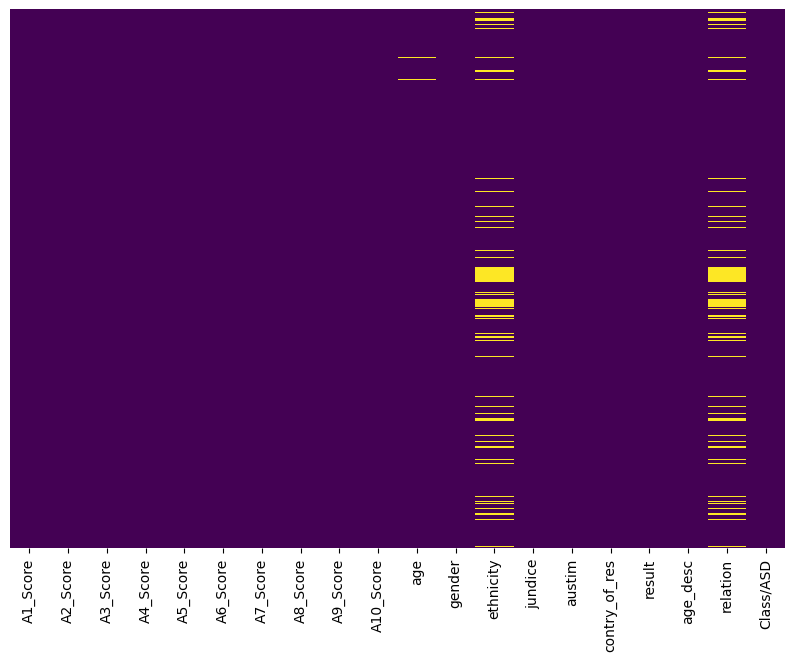

In [11]:
plt.figure(figsize=(10,7))
sns.heatmap(data.isnull(),cmap="viridis",cbar=False,yticklabels=False)

In [12]:
data['age']=data['age'].apply(lambda x:float(x))

In [13]:
data['age'].max()

383.0

In [14]:
data_p=data
data_p.dropna(inplace=True)

In [15]:
data.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000
mean,0.740558,0.469622,0.481117,0.520525,0.525452,0.307061,0.428571,0.665025,0.341544,0.597701,30.215107,5.077176
std,0.438689,0.499487,0.500054,0.499989,0.499762,0.461654,0.495278,0.472370,0.474617,0.490765,17.287470,2.522717
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,3.000000
50%,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,5.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


C:\Users\hp\AppData\Local\Temp\ipykernel_24616\1424971540.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_p['age'],bins=50,kde=False)


<Axes: xlabel='age'>

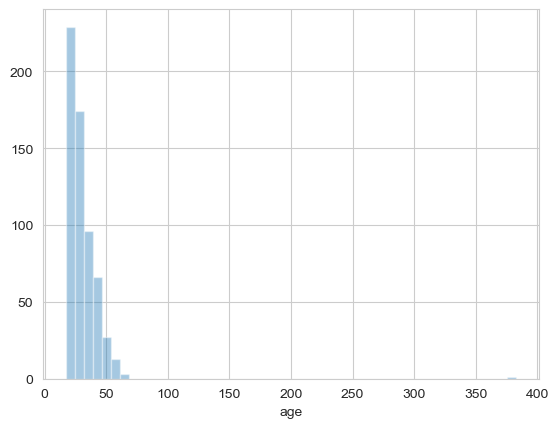

In [16]:
sns.set_style('whitegrid')
sns.distplot(data_p['age'],bins=50,kde=False)

In [17]:
data_t=data_p[data_p['age']!=383]

In [18]:
data_t['age'].mean()

29.63486842105263

In [19]:
data.loc[data.age == 383, 'age'] = 30

<Axes: >

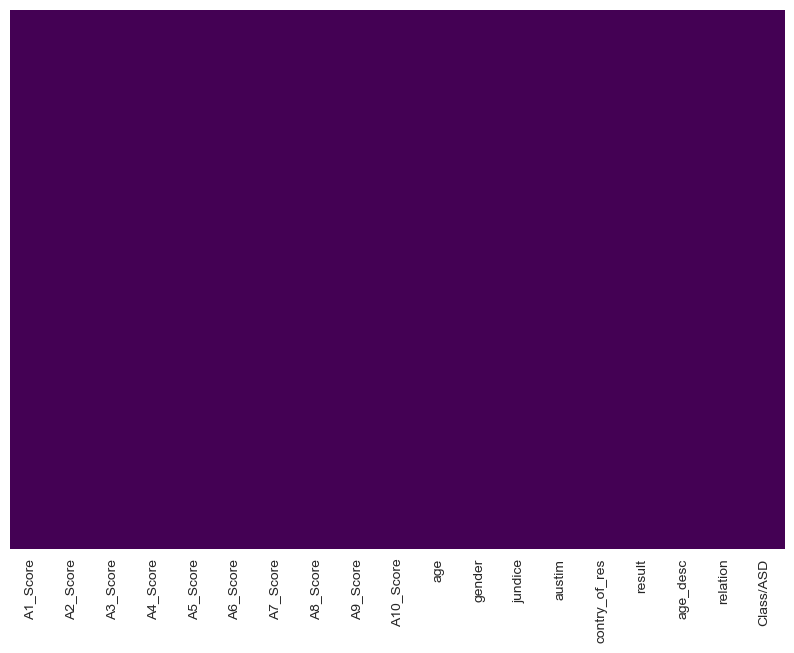

In [20]:
data['age']=data['age'].fillna(30)
data=data.drop('ethnicity',axis=1)
plt.figure(figsize=(10,7))
sns.heatmap(data.isnull(),cmap="viridis",cbar=False,yticklabels=False)

In [21]:
data.drop(['contry_of_res','age_desc','relation'],axis=1,inplace=True)
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,austim,result,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,f,no,no,6,NO
1,1,1,0,1,0,0,0,1,0,1,24.0,m,no,yes,5,NO
2,1,1,0,1,1,0,1,1,1,1,27.0,m,yes,yes,8,YES
3,1,1,0,1,0,0,1,1,0,1,35.0,f,no,yes,6,NO
5,1,1,1,1,1,0,1,1,1,1,36.0,m,yes,no,9,YES


In [22]:
sex=pd.get_dummies(data['gender'],drop_first=True)
jaund=pd.get_dummies(data['jundice'],drop_first=True,prefix="Had_jaundice")
rel_autism=pd.get_dummies(data['austim'],drop_first=True,prefix="Rel_had")
detected=pd.get_dummies(data['Class/ASD'],drop_first=True,prefix="Detected")

In [23]:
data=data.drop(['gender','jundice','austim','Class/ASD'],axis=1)
data_featured=pd.concat([data,sex,jaund,rel_autism,detected],axis=1)
data_featured.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,m,Had_jaundice_yes,Rel_had_yes,Detected_YES
0,1,1,1,1,0,0,1,1,0,0,26.0,6,0,0,0,0
1,1,1,0,1,0,0,0,1,0,1,24.0,5,1,0,1,0
2,1,1,0,1,1,0,1,1,1,1,27.0,8,1,1,1,1
3,1,1,0,1,0,0,1,1,0,1,35.0,6,0,0,1,0
5,1,1,1,1,1,0,1,1,1,1,36.0,9,1,1,0,1


C:\Users\hp\AppData\Local\Temp\ipykernel_24616\219094534.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_featured['age'],bins=50,kde=False)


<Axes: xlabel='age'>

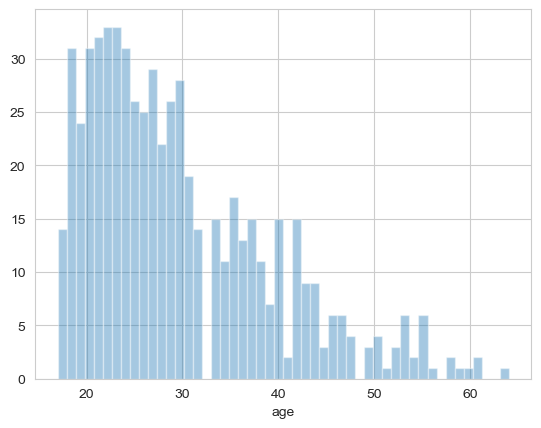

In [24]:
sns.distplot(data_featured['age'],bins=50,kde=False)

<Axes: xlabel='Detected_YES', ylabel='count'>

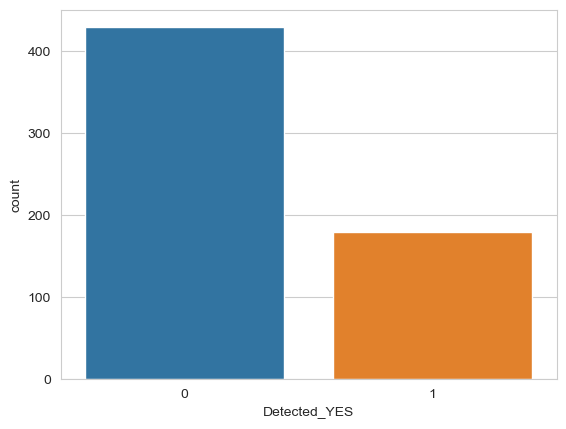

In [25]:
sns.countplot(x='Detected_YES',data=data_featured)

<Axes: xlabel='Detected_YES', ylabel='count'>

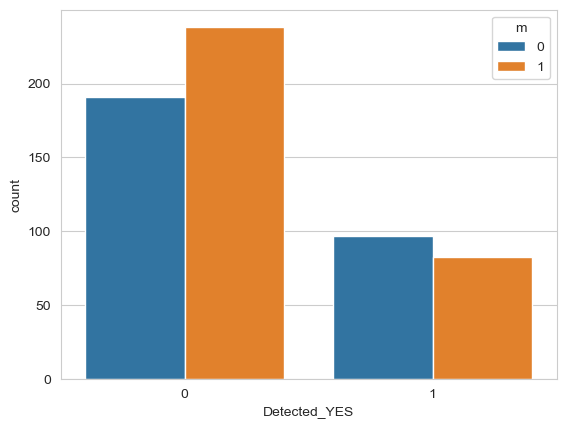

In [26]:
sns.countplot(x='Detected_YES',hue="m",data=data_featured)

<Axes: xlabel='Detected_YES', ylabel='count'>

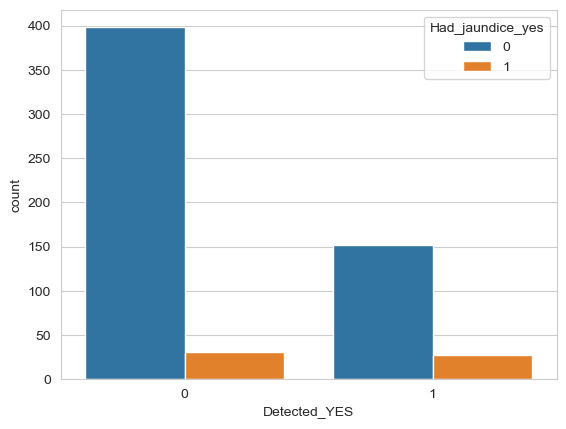

In [27]:
sns.countplot(x='Detected_YES',hue="Had_jaundice_yes",data=data_featured)

<Axes: xlabel='Detected_YES', ylabel='count'>

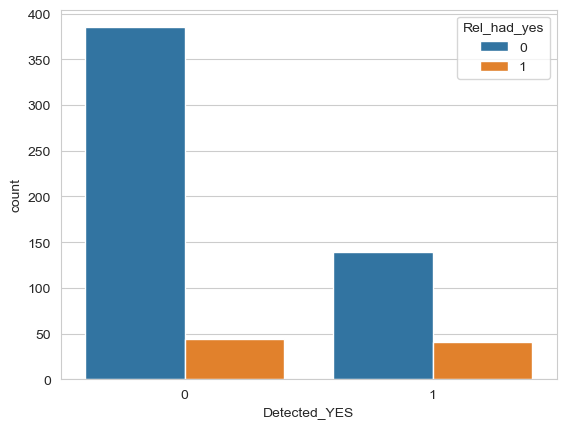

In [28]:
sns.countplot(x='Detected_YES',hue="Rel_had_yes",data=data_featured)

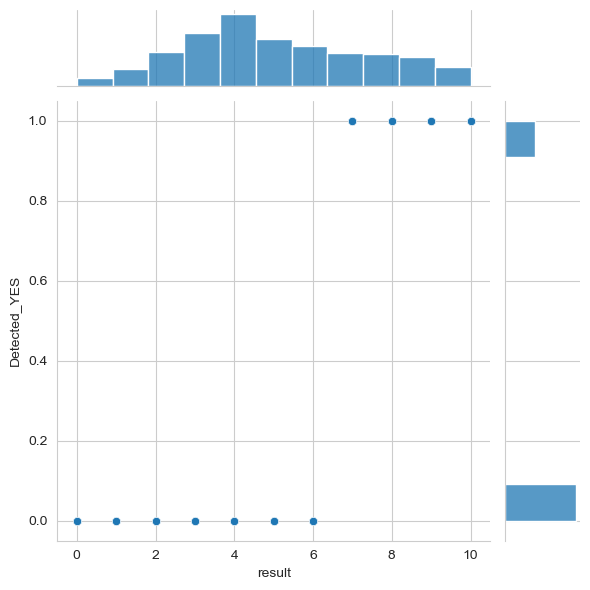

In [29]:
sns.jointplot(x="result",y="Detected_YES",data=data_featured)

<Axes: >

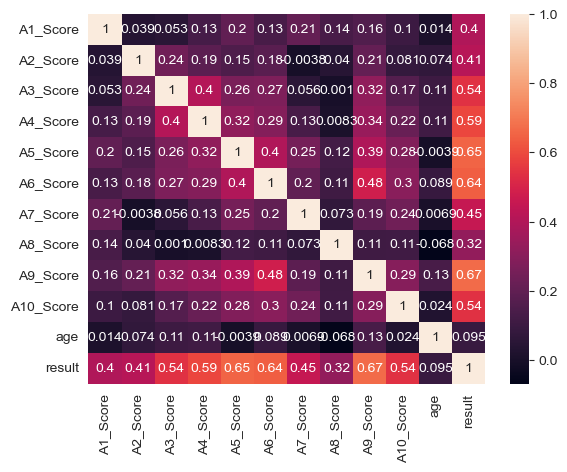

In [30]:
sns.heatmap(data.corr(),annot=True)

In [31]:
X=data_featured[['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'result', 'm',
       'Had_jaundice_yes', 'Rel_had_yes']]
y=data_featured['Detected_YES']

In [32]:
X

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,m,Had_jaundice_yes,Rel_had_yes
0,1,1,1,1,0,0,1,1,0,0,26.0,6,0,0,0
1,1,1,0,1,0,0,0,1,0,1,24.0,5,1,0,1
2,1,1,0,1,1,0,1,1,1,1,27.0,8,1,1,1
3,1,1,0,1,0,0,1,1,0,1,35.0,6,0,0,1
5,1,1,1,1,1,0,1,1,1,1,36.0,9,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,1,1,1,1,1,1,1,1,1,1,27.0,10,0,0,0
699,0,1,0,1,1,0,1,1,1,1,25.0,7,0,0,0
700,1,0,0,0,0,0,0,1,0,1,34.0,3,1,0,0
702,1,0,0,1,1,0,1,0,1,1,35.0,6,1,0,0


In [33]:
X.result.describe()

count    609.000000
mean       5.077176
std        2.522717
min        0.000000
25%        3.000000
50%        5.000000
75%        7.000000
max       10.000000
Name: result, dtype: float64

In [34]:
y

0      0
1      0
2      1
3      0
5      1
      ..
698    1
699    1
700    0
702    0
703    1
Name: Detected_YES, Length: 609, dtype: uint8

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
lgr=LogisticRegression()

In [39]:
lgr.fit(X_train,y_train)

LogisticRegression()

In [40]:
pred=lgr.predict(X_test)

In [41]:
y_pred_lgr = lgr.predict(X_test)

In [42]:
from sklearn.metrics import classification_report

In [43]:
accuracy_lgr = accuracy_score(y_test,y_pred_lgr)
print('Accuracy LGR:', accuracy_lgr*100)

Accuracy LGR: 100.0


In [44]:
print(classification_report(y_true=y_test,y_pred=pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00        51

    accuracy                           1.00       183
   macro avg       1.00      1.00      1.00       183
weighted avg       1.00      1.00      1.00       183



# SVC

In [45]:
from sklearn.svm import SVC 
svm=SVC(kernel='rbf', random_state=0) 
svm.fit(X_train, y_train)

SVC(random_state=0)

In [46]:
y_pred_svc=svm.predict(X_test)

In [47]:
print('Training Set: ', svm.score (X_train,y_train)) 

print('Testing Set:',svm.score(X_test,y_test))

Training Set:  0.9530516431924883
Testing Set: 0.9453551912568307


In [48]:
accuracy_SVC=svm.score(X_test,y_test) 
print('Accuracy_SVM:', accuracy_SVC*100)

Accuracy_SVM: 94.53551912568307


# Decision Tree

In [49]:
dt = DecisionTreeClassifier()

dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [50]:
y_pred_dt=dt.predict(X_test)

In [51]:
print('Training Set: ',dt.score(X_train,y_train))

print('Test Set: ',dt.score(X_test,y_test))

Training Set:  1.0
Test Set:  1.0


In [52]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_dt)*100)

Accuracy: 100.0


In [53]:
accuracy_dt=accuracy_score(y_test,y_pred_dt) 
print('Accuracy DT:', accuracy_dt*100)

Accuracy DT: 100.0


# Random Forest

In [54]:
rand_forest = RandomForestClassifier(random_state=42)

In [55]:
rand_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [56]:
predictionRF = rand_forest.predict(X_test)

print('Training set: ',rand_forest.score(X_train, y_train))
print('Testing set: ',rand_forest.score(X_test, y_test))

Training set:  1.0
Testing set:  1.0


In [57]:
accuracy_RF=rand_forest.score(X_test, y_test)
print ("Accuracy_RF:",accuracy_RF*100)

Accuracy_RF: 100.0


# KNN

In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [59]:
y_pred = knn.predict(X_test)

In [60]:
#Calculate accuracy of the model

from sklearn.metrics import accuracy_score 
accuracy_KNN = accuracy_score(y_test, y_pred) 
print(f'Accuracy_KNN: {accuracy_KNN*100}')

Accuracy_KNN: 96.17486338797814


# Testing the model

In [61]:
import pickle

In [62]:
pickle.dump(knn,open(r"C:\Users\hp\OneDrive\Documents\ASD (PROJECT)\PROJECT (ASD)\model.pkl",'wb'))

In [63]:
with open(r"C:\Users\hp\OneDrive\Documents\ASD (PROJECT)\PROJECT (ASD)\model.pkl", 'rb') as file:
    model_loaded = pickle.load(file)

In [64]:
model=pickle.load(open(r"C:\Users\hp\OneDrive\Documents\ASD (PROJECT)\PROJECT (ASD)\model.pkl", 'rb')) 
print(model.predict([[1,1,1,1,0,0,1,1,0,0,26,6,0,0,0]]))

[0]


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


# Testing Model With Multiple Evaluation Metrics

# Compare the Model:

In [65]:
accuracy_df = pd.DataFrame({

'Model': ['LogisticRegression', 'SVM', 'DecisionTree', 'Randomforest', 'KNN'], 
'Accuracy': [accuracy_lgr*100, accuracy_SVC*100, accuracy_dt*100, accuracy_RF*100, accuracy_KNN*100]
    })

print(accuracy_df)

                Model    Accuracy
0  LogisticRegression  100.000000
1                 SVM   94.535519
2        DecisionTree  100.000000
3        Randomforest  100.000000
4                 KNN   96.174863


Text(0, 0.5, 'Accuracy')

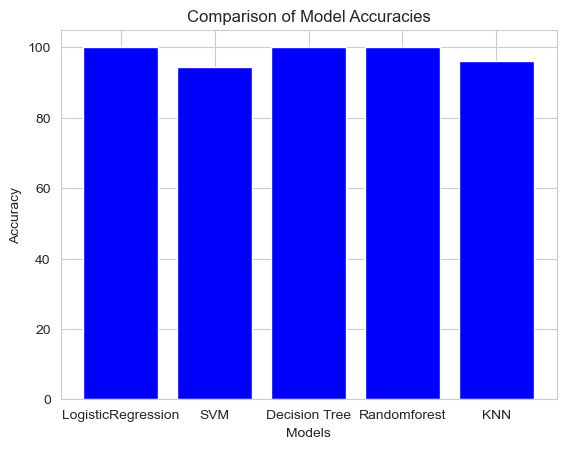

In [66]:
models = ['LogisticRegression', 'SVM', 'Decision Tree', 'Randomforest', 'KNN']

accuracies = [accuracy_lgr*100, accuracy_SVC*100, accuracy_dt*100, accuracy_RF*100, accuracy_KNN*100] 
plt.bar(models, accuracies, color='blue')

#Add title and axis Labels

plt.title('Comparison of Model Accuracies')

plt.xlabel('Models')

plt.ylabel('Accuracy')

# Model Deployment

In [68]:
import joblib
classifier = joblib.dump(rand_forest, 'rand_forest.pkl')